In [ ]:
# 上传 Excel 文件（或使用 Google Drive）
from google.colab import files
uploaded = files.upload()

Saving cosine similarity calculationM vs M-F.xlsx to cosine similarity calculationM vs M-F.xlsx


cosine similarity calculation

many to many

Saving cosine similarity calculationM vs M-F.xlsx to cosine similarity calculationM vs M-F.xlsx


Embedding B: 100%|██████████| 299/299 [01:39<00:00,  3.00it/s]



Average Cosine Similarity: 0.8835 ± 0.0306
Average Euclidean Distance: 0.4786 ± 0.0630
Permutation Test Summary:
Observed Statistic: 0.1876
p-value: 0.0000
Effect Size (Cohen's d): 89.7472


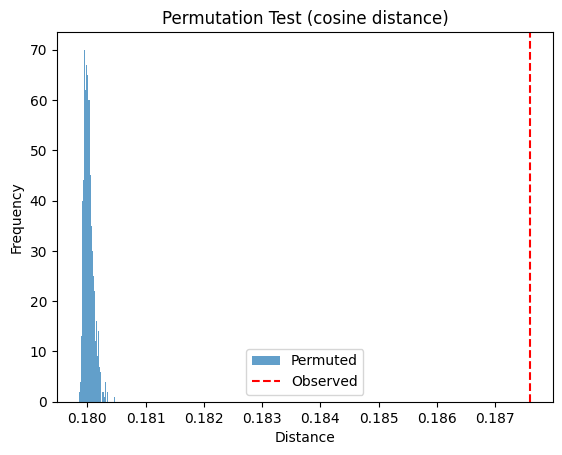

In [ ]:
# ✅ 安装所需库（如未安装）
!pip install openai pandas scipy numpy openpyxl tqdm

# ✅ 导入库
import openai
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from tqdm import tqdm
import matplotlib.pyplot as plt
from getpass import getpass

# ✅ 设置 OpenAI API key
openai_api_key = getpass("🔐 请输入你的 OpenAI API Key: ")


# ✅ 嵌入函数
def get_embedding(text, model="text-embedding-3-large"):
    response = openai.embeddings.create(
        input=text,
        model=model,
        encoding_format="float"
    )
    return np.array(response.data[0].embedding)


# 自动识别第一个上传的文件名
excel_path = list(uploaded.keys())[0]

# 读取 Excel
df = pd.read_excel(excel_path)

# ✅ 提取文本列（假设是 A 和 B）
texts_a = df.iloc[:, 0].astype(str).tolist()
texts_b = df.iloc[:, 1].astype(str).tolist()

# ✅ 获取嵌入（带进度条）
embeddings_a = np.array([get_embedding(text) for text in tqdm(texts_a, desc="Embedding A")])
embeddings_b = np.array([get_embedding(text) for text in tqdm(texts_b, desc="Embedding B")])

# ✅ Cosine 相似度计算（逐行对应）
def assess_cos_similarity(matrix1, matrix2):
    dot_product = np.sum(matrix1 * matrix2, axis=1)
    norm1 = np.linalg.norm(matrix1, axis=1)
    norm2 = np.linalg.norm(matrix2, axis=1)
    cosine_similarities = dot_product / (norm1 * norm2)
    return cosine_similarities

# ✅ 欧几里得距离（逐行对应）
def assess_euclidean_distance(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2, axis=1)

# ✅ Permutation Test
def permutation_test(matrix1, matrix2, n_permutations=1000, metric='cosine', seed=42):
    np.random.seed(seed)
    combined = np.vstack((matrix1, matrix2))
    obs_stat = np.mean(cdist(matrix1, matrix2, metric=metric))

    perm_stats = []
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_group1 = combined[:len(matrix1)]
        perm_group2 = combined[len(matrix1):]
        perm_stat = np.mean(cdist(perm_group1, perm_group2, metric=metric))
        perm_stats.append(perm_stat)

    perm_stats = np.array(perm_stats)
    p_value = np.mean(perm_stats >= obs_stat)
    effect_size = (obs_stat - np.mean(perm_stats)) / np.std(perm_stats)

    print("Permutation Test Summary:")
    print(f"Observed Statistic: {obs_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Effect Size (Cohen's d): {effect_size:.4f}")

    # 可选：绘图
    plt.hist(perm_stats, bins=50, alpha=0.7, label='Permuted')
    plt.axvline(obs_stat, color='red', linestyle='--', label='Observed')
    plt.legend()
    plt.title(f"Permutation Test ({metric} distance)")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.show()

# ✅ 执行相似度分析
cos_sim = assess_cos_similarity(embeddings_a, embeddings_b)
euc_dist = assess_euclidean_distance(embeddings_a, embeddings_b)

print(f"\nAverage Cosine Similarity: {cos_sim.mean():.4f} ± {cos_sim.std():.4f}")
print(f"Average Euclidean Distance: {euc_dist.mean():.4f} ± {euc_dist.std():.4f}")

# ✅ 执行 permutation test
permutation_test(embeddings_a, embeddings_b, metric='cosine')

In [ ]:
# 保存为 .npy（更快更高效）
np.save("embeddings_a.npy", embeddings_a)
np.save("embeddings_b.npy", embeddings_b)

# 如要保存为 CSV（便于外部查看）
pd.DataFrame(embeddings_a).to_csv("embeddings_a.csv", index=False)
pd.DataFrame(embeddings_b).to_csv("embeddings_b.csv", index=False)

# 加载方法：
embeddings_a = np.load("embeddings_a.npy")
embeddings_b = np.load("embeddings_b.npy")

In [ ]:
from google.colab import files
files.download('/content/embeddings_a.npy')
files.download('/content/embeddings_b.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

embeddings_a shape: (299, 3072)
embeddings_b shape: (299, 3072)

=== Descriptive Statistics ===
       cosine_similarity  euclidean_distance
count         299.000000          299.000000
mean            0.883496            0.478581
std             0.030610            0.063100
min             0.779743            0.274283
25%             0.865572            0.435302
50%             0.887269            0.474829
75%             0.905256            0.518513
max             0.962384            0.663712


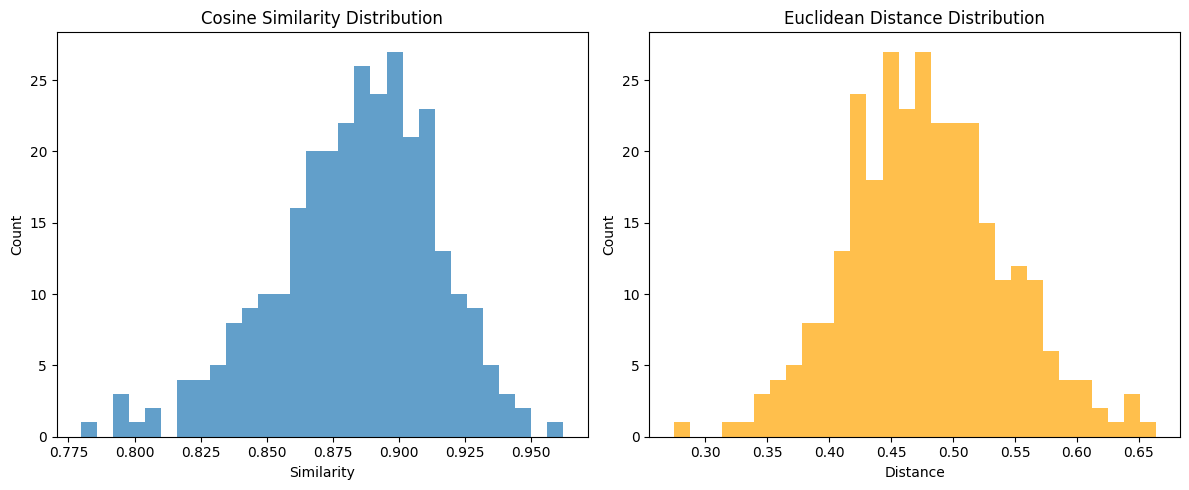


Running Cosine Similarity Analysis...


Permutations: 100%|██████████| 5000/5000 [11:51<00:00,  7.03it/s]



=== Permutation Test Results ===
Metric: cosine
Observed Statistic: 0.1876
Permutation Mean: 0.1800
p-value (two-tailed): 0.0000
Effect Size (Permutation Z): 0.1264
Cohen's d (between vs within): 0.2676


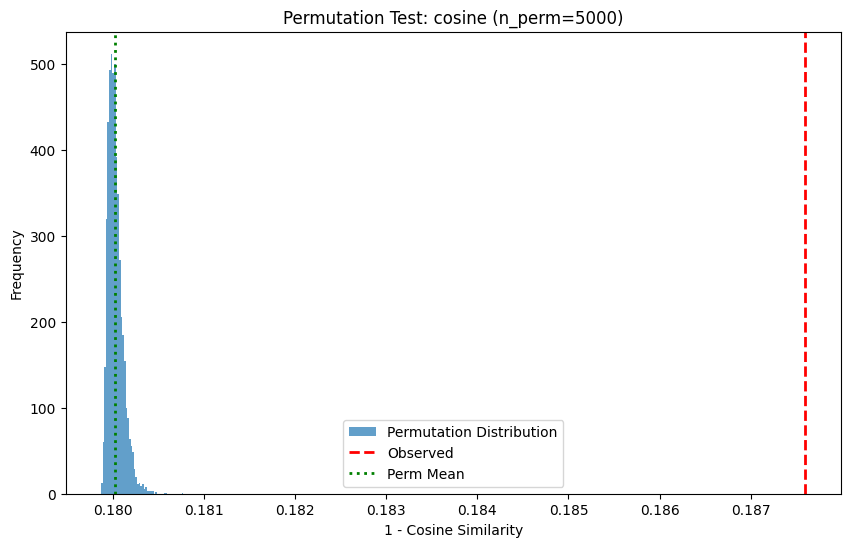


Running Euclidean Distance Analysis...


Permutations: 100%|██████████| 5000/5000 [08:26<00:00,  9.87it/s]



=== Permutation Test Results ===
Metric: euclidean
Observed Statistic: 0.6052
Permutation Mean: 0.5910
p-value (two-tailed): 0.0000
Effect Size (Permutation Z): 0.1492
Cohen's d (between vs within): 0.3153


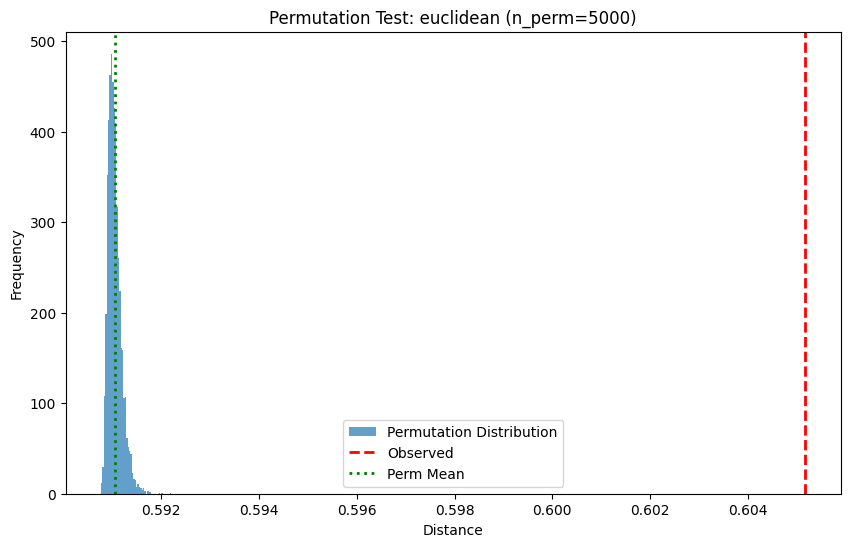

In [ ]:
# ✅ 安装所需库（如未安装）
!pip install scipy numpy matplotlib tqdm pingouin

# ✅ 导入库
import numpy as np
from scipy.spatial.distance import cdist
from tqdm import tqdm
import matplotlib.pyplot as plt
import pingouin as pg  # 用于计算经典Cohen's d
import pandas as pd


# ✅ 加载您上传的嵌入数据（假设已通过Colab上传）
# 请确保文件路径正确，例如：
embeddings_a = np.load('embeddings_a.npy')
embeddings_b = np.load('embeddings_b.npy')

# ✅ 检查数据形状
print(f"embeddings_a shape: {embeddings_a.shape}")  # 应为 (n_samples, embedding_dim)
print(f"embeddings_b shape: {embeddings_b.shape}")

# ✅ 改进的相似度/距离计算函数
def assess_similarity(matrix1, matrix2):
    """计算所有指标并返回DataFrame"""
    # Cosine相似度（逐对计算）
    cosine_sim = np.array([np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
                          for v1, v2 in zip(matrix1, matrix2)])

    # 欧氏距离（逐对计算）
    euclidean_dist = np.linalg.norm(matrix1 - matrix2, axis=1)

    # 汇总结果
    results = pd.DataFrame({
        'cosine_similarity': cosine_sim,
        'euclidean_distance': euclidean_dist
    })
    return results

# ✅ 改进的置换检验与效应量计算
def permutation_test(matrix1, matrix2, n_permutations=5000, metric='cosine', seed=42):
    np.random.seed(seed)
    combined = np.vstack((matrix1, matrix2))
    n = len(matrix1)

    # 观察统计量
    obs_stat = np.mean(cdist(matrix1, matrix2, metric=metric))

    # 置换检验
    perm_stats = []
    for _ in tqdm(range(n_permutations), desc="Permutations"):
        np.random.shuffle(combined)
        perm_group1 = combined[:n]
        perm_group2 = combined[n:]
        perm_stat = np.mean(cdist(perm_group1, perm_group2, metric=metric))
        perm_stats.append(perm_stat)

    perm_stats = np.array(perm_stats)

    # 双尾p值
    p_value = np.mean(np.abs(perm_stats - np.mean(perm_stats)) >= np.abs(obs_stat - np.mean(perm_stats)))

    # ✅ 修正效应量：使用原始数据标准差作为分母
    pooled_std = np.std(cdist(matrix1, matrix2, metric=metric))
    effect_size_perm = (obs_stat - np.mean(perm_stats)) / pooled_std

    # 其余保持原有逻辑...

    # 效应量2：经典Cohen's d（基于原始数据分布）
    if metric == 'cosine':
        # 对于cosine相似度，转换为距离（1 - cosine）以保持方向一致性
        all_dists = 1 - np.array([np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
                         for v1 in matrix1 for v2 in matrix2])
        within_dists = 1 - np.array([np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
                           for v1 in matrix1 for v2 in matrix1])
    else:
        all_dists = cdist(matrix1, matrix2, metric=metric).flatten()
        within_dists = cdist(matrix1, matrix1, metric=metric).flatten()

    cohen_d = pg.compute_effsize(all_dists, within_dists, eftype='cohen')

    # 打印结果
    print("\n=== Permutation Test Results ===")
    print(f"Metric: {metric}")
    print(f"Observed Statistic: {obs_stat:.4f}")
    print(f"Permutation Mean: {np.mean(perm_stats):.4f}")
    print(f"p-value (two-tailed): {p_value:.4f}")
    print(f"Effect Size (Permutation Z): {effect_size_perm:.4f}")
    print(f"Cohen's d (between vs within): {cohen_d:.4f}")

    # 绘制置换分布
    plt.figure(figsize=(10, 6))
    plt.hist(perm_stats, bins=50, alpha=0.7, label='Permutation Distribution')
    plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label='Observed')
    plt.axvline(np.mean(perm_stats), color='green', linestyle=':', linewidth=2, label='Perm Mean')
    plt.legend()
    plt.title(f"Permutation Test: {metric} (n_perm={n_permutations})")
    plt.xlabel("Distance" if metric != 'cosine' else "1 - Cosine Similarity")
    plt.ylabel("Frequency")
    plt.show()

    return {
        'observed_stat': obs_stat,
        'p_value': p_value,
        'effect_size_perm': effect_size_perm,
        'cohen_d': cohen_d
    }

# ✅ 主分析流程
if __name__ == "__main__":
    # 1. 计算基础统计量
    similarity_results = assess_similarity(embeddings_a, embeddings_b)
    print("\n=== Descriptive Statistics ===")
    print(similarity_results.describe())

    # 2. 绘制分布图
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(similarity_results['cosine_similarity'], bins=30, alpha=0.7)
    plt.title("Cosine Similarity Distribution")
    plt.xlabel("Similarity")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.hist(similarity_results['euclidean_distance'], bins=30, alpha=0.7, color='orange')
    plt.title("Euclidean Distance Distribution")
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # 3. 执行置换检验（Cosine相似度）
    print("\nRunning Cosine Similarity Analysis...")
    cos_result = permutation_test(embeddings_a, embeddings_b, metric='cosine')

    # 4. 执行置换检验（欧氏距离）
    print("\nRunning Euclidean Distance Analysis...")
    euc_result = permutation_test(embeddings_a, embeddings_b, metric='euclidean')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


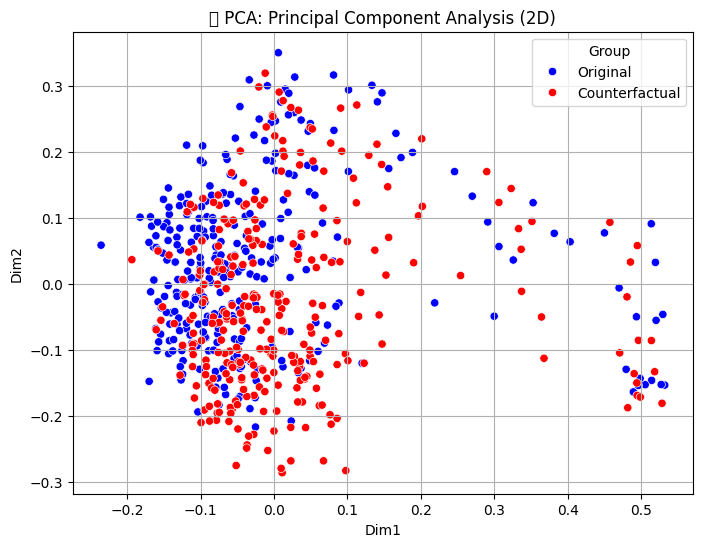

✅ PCA统计指标：
特征值 (Eigenvalues): [0.02243905 0.01703267]
解释方差比 (Explained Variance Ratio): [0.12464227 0.09461141]
累计解释方差: 0.2193
重建误差 (MSE): 0.0000
解释：解释方差越高，说明主成分保留越多原始数据的信息。重建误差反映降维后丢失信息的程度。



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


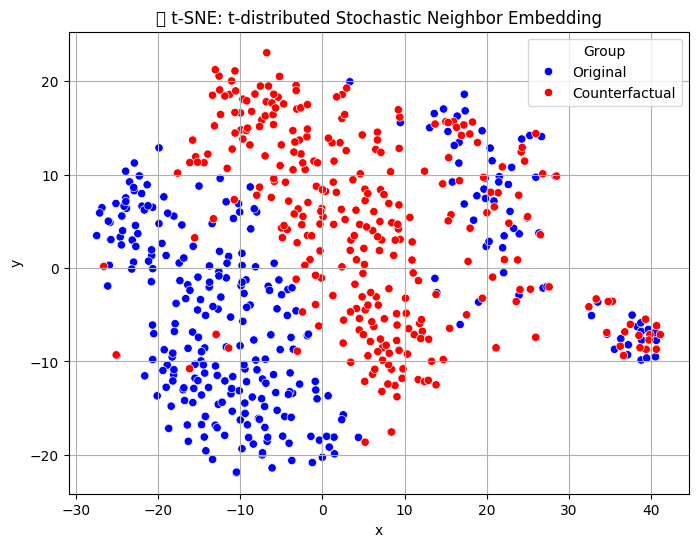

✅ t-SNE 统计指标：
KL 散度 (KL Divergence): 1.0723
信任度 (Trustworthiness): 0.9561
最近邻保留率 (k-NN Preservation Rate): 0.4592
解释：KL 散度衡量低维和高维空间间的信息差异。信任度和k-NN保留率越高，说明嵌入越忠实于原始结构。



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


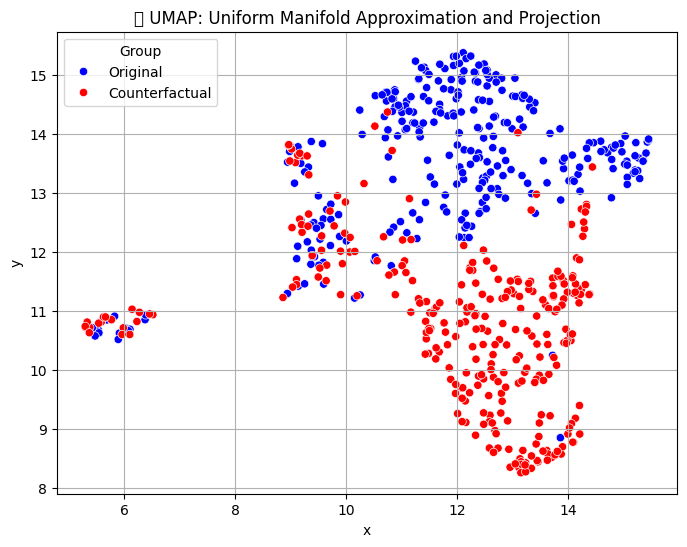

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


✅ UMAP 统计指标：
最近邻保留率 (k-NN Preservation Rate): 0.3408
解释：UMAP保留最近邻结构的能力反映其嵌入的忠实程度，适合分析类簇和局部结构。



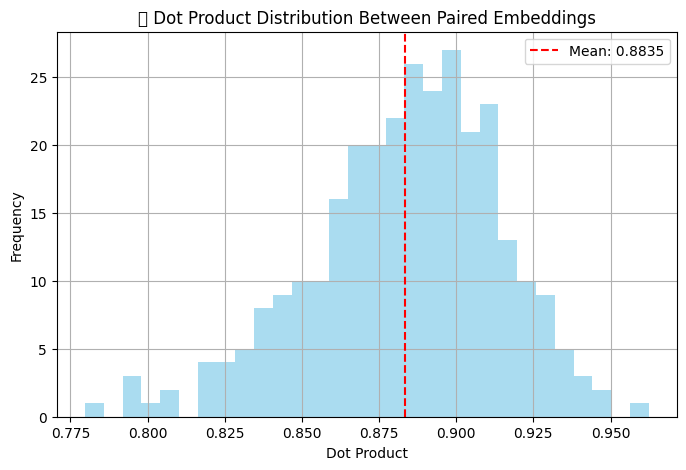

✅ Dot Product统计量：
平均值 (Mean): 0.8835
标准差 (Std): 0.0306
解释：点积反映向量在同一方向上的重合程度，高点积值说明语义高度一致。



In [ ]:
!pip install umap-learn
import umap
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from sklearn.manifold import trustworthiness
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt


def analyze_and_visualize_embeddings(embeddings_a, embeddings_b, labels=('Original', 'Counterfactual')):
    combined = np.vstack((embeddings_a, embeddings_b))
    group_labels = [labels[0]] * len(embeddings_a) + [labels[1]] * len(embeddings_b)

    # ===============================
    # 1️⃣ PCA 降维 & 可视化 + 解释性指标
    # ===============================
    pca = PCA(n_components=2)
    reduced_pca = pca.fit_transform(combined)

    df_pca = pd.DataFrame({
        'Dim1': reduced_pca[:, 0],
        'Dim2': reduced_pca[:, 1],
        'Group': group_labels
    })

    plt.figure(figsize=(8, 6))
    palette = {labels[0]: 'blue', labels[1]: 'red'}
    sns.scatterplot(data=df_pca, x='Dim1', y='Dim2', hue='Group', palette=palette)
    plt.title("🧬 PCA: Principal Component Analysis (2D)")
    plt.grid(True)
    plt.show()

    # 输出解释性指标
    explained_var = pca.explained_variance_ratio_
    eigenvalues = pca.explained_variance_
    projected = pca.inverse_transform(reduced_pca)
    reconstruction_error = mean_squared_error(combined, projected)

    print("✅ PCA统计指标：")
    print(f"特征值 (Eigenvalues): {eigenvalues}")
    print(f"解释方差比 (Explained Variance Ratio): {explained_var}")
    print(f"累计解释方差: {np.sum(explained_var):.4f}")
    print(f"重建误差 (MSE): {reconstruction_error:.4f}")
    print("解释：解释方差越高，说明主成分保留越多原始数据的信息。重建误差反映降维后丢失信息的程度。\n")

    # ===============================
    # 2️⃣ t-SNE 降维 & 可视化 + 指标
    # ===============================
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
    reduced_tsne = tsne.fit_transform(combined)

    df_tsne = pd.DataFrame({
        'x': reduced_tsne[:, 0],
        'y': reduced_tsne[:, 1],
        'Group': group_labels
    })

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_tsne, x='x', y='y', hue='Group', palette=palette)
    plt.title("🧬 t-SNE: t-distributed Stochastic Neighbor Embedding")
    plt.grid(True)
    plt.show()

    # 输出 t-SNE 指标
    trust = trustworthiness(combined, reduced_tsne, n_neighbors=5)

    # 最近邻保留率估算
    knn_original = NearestNeighbors(n_neighbors=5).fit(combined).kneighbors(return_distance=False)
    knn_embedded = NearestNeighbors(n_neighbors=5).fit(reduced_tsne).kneighbors(return_distance=False)
    preserved = np.mean([
        len(np.intersect1d(knn_original[i], knn_embedded[i])) / 5.0
        for i in range(len(combined))
    ])

    print("✅ t-SNE 统计指标：")
    print(f"KL 散度 (KL Divergence): {tsne.kl_divergence_:.4f}")
    print(f"信任度 (Trustworthiness): {trust:.4f}")
    print(f"最近邻保留率 (k-NN Preservation Rate): {preserved:.4f}")
    print("解释：KL 散度衡量低维和高维空间间的信息差异。信任度和k-NN保留率越高，说明嵌入越忠实于原始结构。\n")

    # ===============================
    # 3️⃣ UMAP 降维 & 可视化 + 指标
    # ===============================
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
    reduced_umap = reducer.fit_transform(combined)

    df_umap = pd.DataFrame({
        'x': reduced_umap[:, 0],
        'y': reduced_umap[:, 1],
        'Group': group_labels
    })

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_umap, x='x', y='y', hue='Group', palette=palette)
    plt.title("🧬 UMAP: Uniform Manifold Approximation and Projection")
    plt.grid(True)
    plt.show()

    # 最近邻保留率估算
    knn_embedded_umap = NearestNeighbors(n_neighbors=5).fit(reduced_umap).kneighbors(return_distance=False)
    preserved_umap = np.mean([
        len(np.intersect1d(knn_original[i], knn_embedded_umap[i])) / 5.0
        for i in range(len(combined))
    ])

    print("✅ UMAP 统计指标：")
    print(f"最近邻保留率 (k-NN Preservation Rate): {preserved_umap:.4f}")
    print("解释：UMAP保留最近邻结构的能力反映其嵌入的忠实程度，适合分析类簇和局部结构。\n")


    # ===============================
    # 3️⃣ Dot Product 分布 & 统计
    # ===============================
    dot_products = np.sum(embeddings_a * embeddings_b, axis=1)
    mean_dot = np.mean(dot_products)
    std_dot = np.std(dot_products)

    plt.figure(figsize=(8, 5))
    plt.hist(dot_products, bins=30, color='skyblue', alpha=0.7)
    plt.axvline(mean_dot, color='red', linestyle='--', label=f"Mean: {mean_dot:.4f}")
    plt.title("🎯 Dot Product Distribution Between Paired Embeddings")
    plt.xlabel("Dot Product")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("✅ Dot Product统计量：")
    print(f"平均值 (Mean): {mean_dot:.4f}")
    print(f"标准差 (Std): {std_dot:.4f}")
    print("解释：点积反映向量在同一方向上的重合程度，高点积值说明语义高度一致。\n")

# 使用方式：
analyze_and_visualize_embeddings(embeddings_a, embeddings_b)

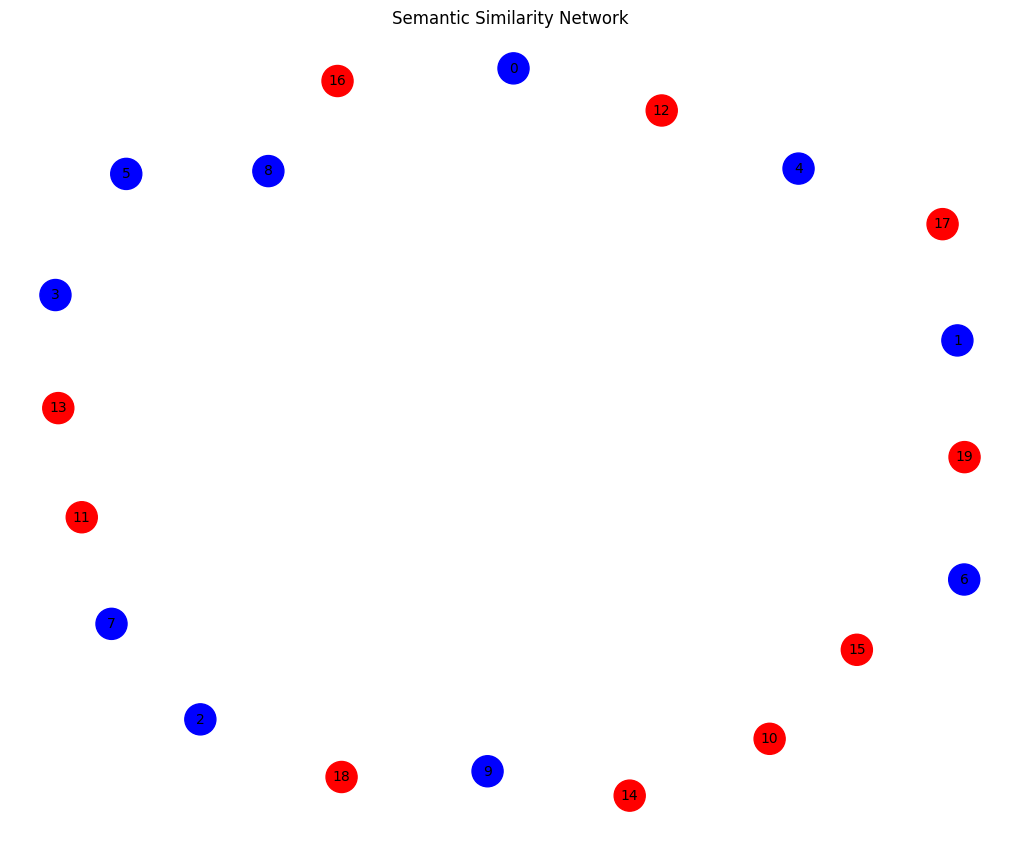

{'Centroid Euclidean Distance': np.float64(2.7460956845973725),
 'Centroid Cosine Distance': np.float64(0.029158117016496177),
 'Silhouette Score (k=2)': np.float64(0.0007504389583452965),
 'Average Feedback Length': np.float64(8.0),
 'Average Type-Token Ratio (TTR)': np.float64(1.0),
 'Dependency Tree (First Text)': '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="c8b76a85bece4b68b3cfbcf6078f3fee-0" class="displacy" width="1450" height="399.5" direction="ltr" style="max-width: none; height: 399.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">This</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PRON</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fi

In [ ]:
# Re-import necessary libraries due to kernel reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import spacy
import networkx as nx

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Dummy embeddings and texts for demonstration (replace with real data)
np.random.seed(42)
embeddings_a = np.random.rand(10, 512)
embeddings_b = np.random.rand(10, 512)
texts_a = ["This is a sample feedback from group A."] * 10
texts_b = ["This is a counterfactual feedback from group B."] * 10

# Combine embeddings and texts
combined_embeddings = np.vstack((embeddings_a, embeddings_b))
combined_texts = texts_a + texts_b

# Labels
group_labels = ['A'] * len(embeddings_a) + ['B'] * len(embeddings_b)

# (1) Group Centroid Distance Analysis
centroid_a = np.mean(embeddings_a, axis=0)
centroid_b = np.mean(embeddings_b, axis=0)
euclidean_distance = np.linalg.norm(centroid_a - centroid_b)
cosine_dist = cosine(centroid_a, centroid_b)

# (2) Clustering Analysis
kmeans = KMeans(n_clusters=2, random_state=42).fit(combined_embeddings)
cluster_labels = kmeans.labels_
sil_score = silhouette_score(combined_embeddings, cluster_labels)

# (3) Textual Feature Analysis
lengths = [len(text.split()) for text in combined_texts]
ttrs = [len(set(text.split())) / len(text.split()) if len(text.split()) > 0 else 0 for text in combined_texts]
avg_length = np.mean(lengths)
avg_ttr = np.mean(ttrs)

# Dependency Tree (example with the first text)
doc = nlp(combined_texts[0])
dep_tree_svg = spacy.displacy.render(doc, style="dep", jupyter=False)

# (4) NetworkX Graph
similarity_matrix = cosine_similarity(combined_embeddings)
G = nx.Graph()
for i, text in enumerate(combined_texts):
    G.add_node(i, label=f'Text {i+1}', group=group_labels[i])

threshold = 0.85
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        sim = similarity_matrix[i][j]
        if sim > threshold:
            G.add_edge(i, j, weight=sim)

# Visualize network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
colors = ['blue' if group_labels[i] == 'A' else 'red' for i in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, font_size=10)
plt.title("Semantic Similarity Network")
plt.show()

# Output results
results = {
    "Centroid Euclidean Distance": euclidean_distance,
    "Centroid Cosine Distance": cosine_dist,
    "Silhouette Score (k=2)": sil_score,
    "Average Feedback Length": avg_length,
    "Average Type-Token Ratio (TTR)": avg_ttr,
    "Dependency Tree (First Text)": dep_tree_svg
}
results

📏 Group Centroid Distance:
- Euclidean Distance: 2.7461
- Cosine Distance: 0.0292

🌀 KMeans Clustering:
- Silhouette Score: 0.0008

📝 Text Feature Analysis:
- Avg. Text Length: 8.00 ± 0.00
- Avg. Type-Token Ratio: 1.0000 ± 0.0000



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


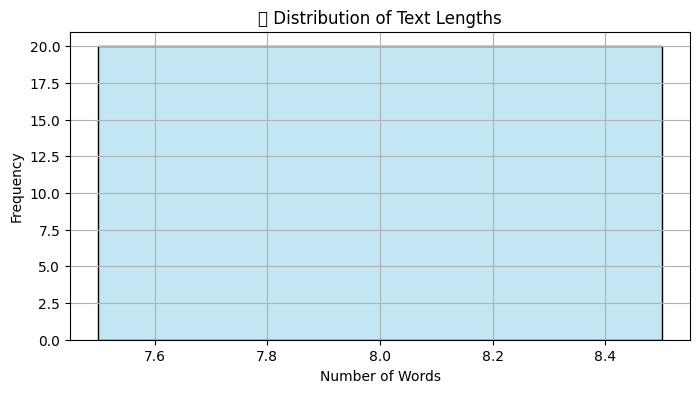

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


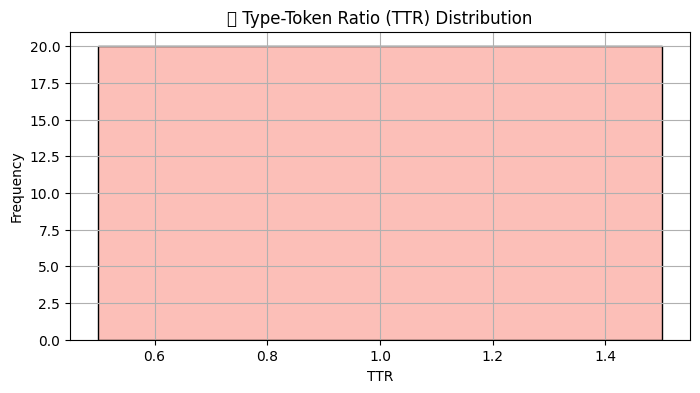

🧠 Dependency Parse Tree for First Sample:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


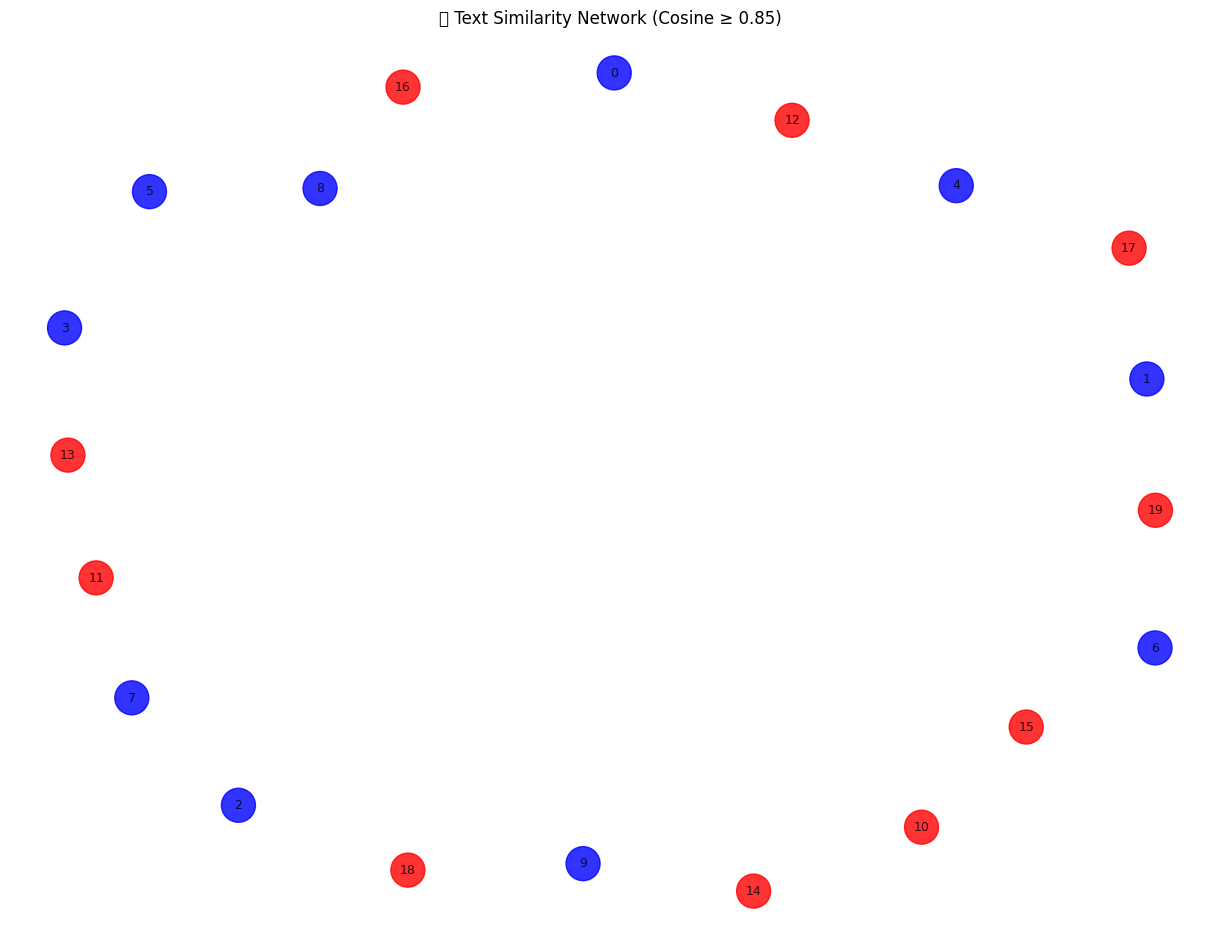

📡 Graph Summary:
- Nodes: 20, Edges: 0
- Avg. Degree: 0.00, Max Degree: 0


In [ ]:
# 📦 导入所需库
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from spacy import displacy
import seaborn as sns

# 假设已加载以下变量：
# embeddings_a, embeddings_b: numpy arrays
# texts_a, texts_b: list of strings

# ===============================
# 1️⃣ Group Centroid Distance 分析
# ===============================
centroid_a = np.mean(embeddings_a, axis=0)
centroid_b = np.mean(embeddings_b, axis=0)

euclidean_distance = np.linalg.norm(centroid_a - centroid_b)
cosine_dist = cosine(centroid_a, centroid_b)

print("📏 Group Centroid Distance:")
print(f"- Euclidean Distance: {euclidean_distance:.4f}")
print(f"- Cosine Distance: {cosine_dist:.4f}\n")

# ===============================
# 2️⃣ 嵌入聚类 + 文本特征分析
# ===============================
combined_embeddings = np.vstack((embeddings_a, embeddings_b))
combined_texts = texts_a + texts_b

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(combined_embeddings)
sil_score = silhouette_score(combined_embeddings, cluster_labels)

print("🌀 KMeans Clustering:")
print(f"- Silhouette Score: {sil_score:.4f}\n")

# 文本长度 + TTR
lengths = [len(text.split()) for text in combined_texts]
ttrs = [len(set(text.split())) / len(text.split()) if len(text.split()) > 0 else 0 for text in combined_texts]

print("📝 Text Feature Analysis:")
print(f"- Avg. Text Length: {np.mean(lengths):.2f} ± {np.std(lengths):.2f}")
print(f"- Avg. Type-Token Ratio: {np.mean(ttrs):.4f} ± {np.std(ttrs):.4f}\n")

# 可视化文本长度分布
plt.figure(figsize=(8, 4))
sns.histplot(lengths, kde=True, color='skyblue')
plt.title("📏 Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 可视化 TTR 分布
plt.figure(figsize=(8, 4))
sns.histplot(ttrs, kde=True, color='salmon')
plt.title("🔤 Type-Token Ratio (TTR) Distribution")
plt.xlabel("TTR")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ===============================
# 3️⃣ 句法树可视化（第一个样本）
# ===============================
nlp = spacy.load("en_core_web_sm")
doc = nlp(combined_texts[0])
print(f"🧠 Dependency Parse Tree for First Sample:")
displacy.render(doc, style='dep', jupyter=True)

# ===============================
# 4️⃣ 文本交互性分析：相似度网络图
# ===============================
similarity_matrix = cosine_similarity(combined_embeddings)
G = nx.Graph()

for i in range(len(combined_texts)):
    G.add_node(i, label=i, group='A' if i < len(embeddings_a) else 'B')

threshold = 0.85  # 可调整
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        sim = similarity_matrix[i][j]
        if sim >= threshold:
            G.add_edge(i, j, weight=sim)

pos = nx.spring_layout(G, seed=42)
colors = ['blue' if G.nodes[n]['group'] == 'A' else 'red' for n in G.nodes]

plt.figure(figsize=(12, 9))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=600, font_size=9, edge_color='gray', alpha=0.8)
plt.title("🔗 Text Similarity Network (Cosine ≥ 0.85)")
plt.show()

print(f"📡 Graph Summary:")
print(f"- Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
degree_dist = [d for _, d in G.degree()]
print(f"- Avg. Degree: {np.mean(degree_dist):.2f}, Max Degree: {np.max(degree_dist)}")


In [ ]:
import pandas as pd
import re

# 分数提取函数
def extract_score(text):
    patterns = [
        r'\*\*(\d[\d.]*)\*\*',  # 新增：匹配 **4** 或 **4.5**
        r'Score:\s*([\d.]+)',    # 匹配 "Score: 3" 或 "Score: 4.5"
        r'^(\d[\d.]*)\s*$',      # 匹配单独一行的分数 "3" 或 "4.5"
        r'(\d[\d.]*)\s*out of 5',# 匹配 "4 out of 5"
        r'(\d[\d.]*)/5',         # 匹配 "4/5"
        r'^(\d[\d.]*)\s*[-:]',   # 匹配 "4 -" 或 "4:"
        r'\b(\d[\d.]*)\s*$'      # 匹配行尾的分数
    ]
    if not isinstance(text, str):
        return None
    first_line = text.split('\n')[0].strip()
    if re.match(r'^\d[\d.]*$', first_line):
        return float(first_line)
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE | re.MULTILINE)
        if match:
            try:
                score = float(match.group(1))
                if 0 <= score <= 5:
                    return score
            except ValueError:
                continue
    return None

# 主处理函数（无表头）
def extract_scores_no_header(input_path, output_path):
    # 读取文件（无表头）
    df = pd.read_excel(input_path, header=None)
    df.columns = ['group a', 'group b']  # 手动命名列

    # 提取评分
    df['group a score'] = df['group a'].apply(extract_score)
    df['group b score'] = df['group b'].apply(extract_score)

    # 只保留分数列
    score_df = df[['group a score', 'group b score']]
    score_df.to_excel(output_path, index=False)
    print("✅ 分数提取完成，已保存为：", output_path)

# 执行
extract_scores_no_header(
    input_path='/content/cosine similarity calculationM vs M-F.xlsx',
    output_path='/content/extracted_scores_only.xlsx'
)

✅ 分数提取完成，已保存为： /content/extracted_scores_only.xlsx


In [ ]:
files.download('/content/extracted_scores_only.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Descriptive Statistics:
       group a score  group b score
count     300.000000     300.000000
mean        3.226667       3.232667
std         0.473677       0.480036
min         2.000000       2.000000
25%         3.000000       3.000000
50%         3.000000       3.000000
75%         3.500000       3.500000
max         4.000000       4.000000

🧪 Paired t-test:
t = -0.2240, p = 0.8229
→ 无显著差异。


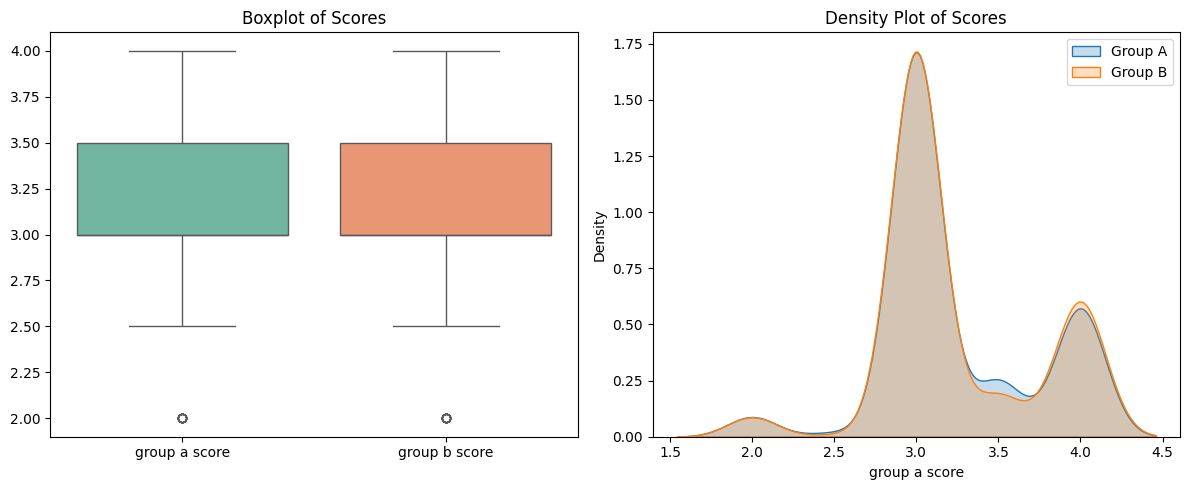

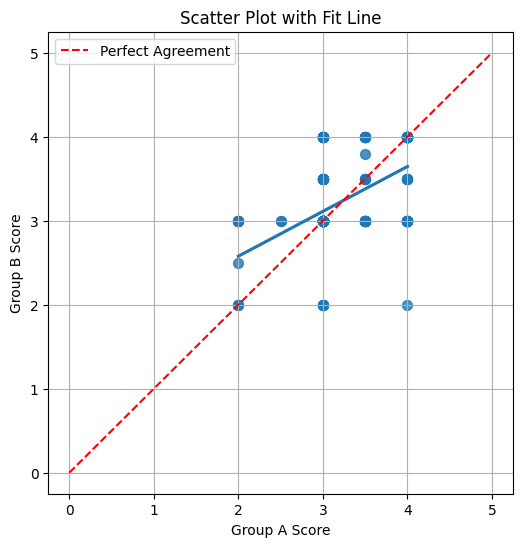

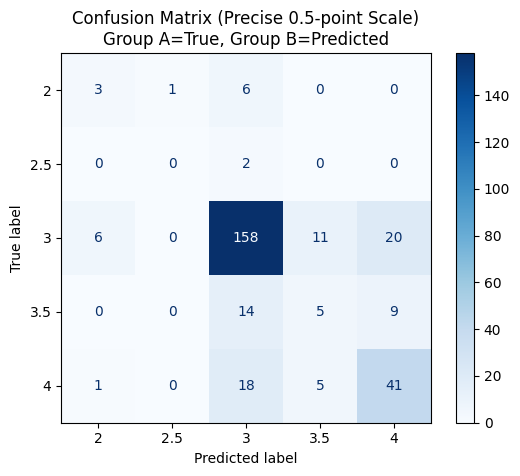


🔍 分类报告（Group A为真实标签，Group B为预测标签）:
              precision    recall  f1-score   support

           2       0.30      0.30      0.30        10
         2.5       0.00      0.00      0.00         2
           3       0.80      0.81      0.80       195
         3.5       0.24      0.18      0.20        28
           4       0.59      0.63      0.61        65

    accuracy                           0.69       300
   macro avg       0.38      0.38      0.38       300
weighted avg       0.68      0.69      0.68       300


🧮 Cohen’s Kappa Score (0.5-point scale): 0.395
→ 一致性水平: 较差一致性


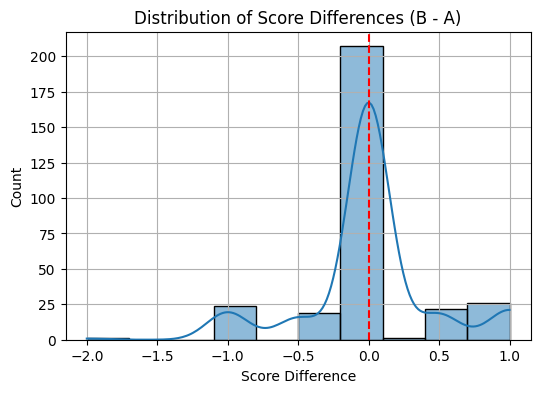


📈 按具体分数分析差异:
当Group A评分为2.0时（n=10）:
  → Group B平均差异: 0.650
  → Group B评分分布: {2.0: 3, 2.5: 1, 3.0: 6}
当Group A评分为2.5时（n=2）:
  → Group B平均差异: 0.500
  → Group B评分分布: {3.0: 2}
当Group A评分为3.0时（n=195）:
  → Group B平均差异: 0.100
  → Group B评分分布: {2.0: 6, 3.0: 158, 3.5: 11, 4.0: 20}
当Group A评分为3.5时（n=28）:
  → Group B平均差异: -0.096
  → Group B评分分布: {3.0: 14, 3.5: 5, 3.8: 1, 4.0: 8}
当Group A评分为4.0时（n=65）:
  → Group B平均差异: -0.346
  → Group B评分分布: {2.0: 1, 3.0: 18, 3.5: 5, 4.0: 41}


<ipython-input-6-b78ca81e0000>:116: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['score_diff'], label=f'A={score}', fill=True)


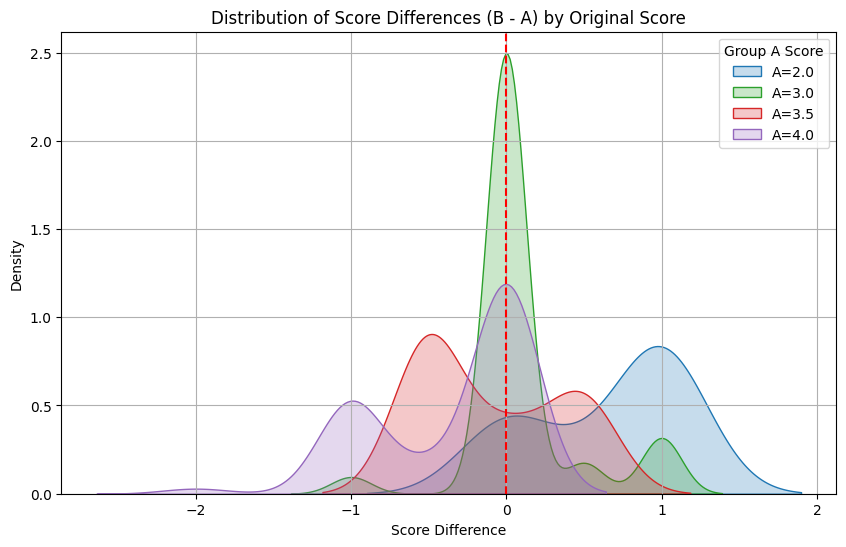


🔄 分数变化方向统计:
direction
No change    207
Increase      49
Decrease      44
Name: count, dtype: int64


<ipython-input-6-b78ca81e0000>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=direction_counts.index, y=direction_counts.values, palette="viridis")


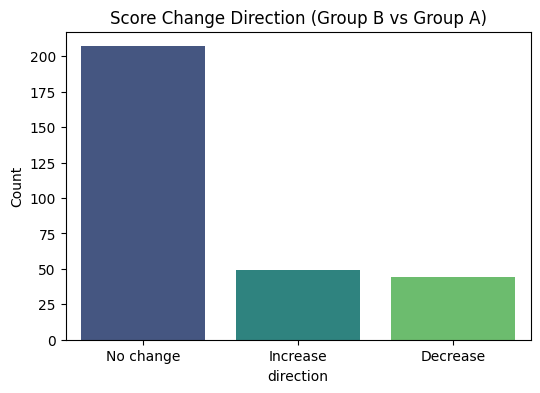


📐 平均评分差异（Group B - Group A）: 0.006


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

# 加载评分数据
df = pd.read_excel("/content/extracted_scores_only.xlsx")
a_scores = df['group a score']
b_scores = df['group b score']

# 1️⃣ 描述性统计
print("📊 Descriptive Statistics:")
print(df.describe())

# 2️⃣ Paired t-test
t_stat, p_val = ttest_rel(a_scores, b_scores)
print(f"\n🧪 Paired t-test:\nt = {t_stat:.4f}, p = {p_val:.4f}")
if p_val < 0.05:
    print("→ 差异显著！")
else:
    print("→ 无显著差异。")

# 3️⃣ 可视化：箱线图 + 密度图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Scores")
plt.subplot(1, 2, 2)
sns.kdeplot(a_scores, label='Group A', fill=True)
sns.kdeplot(b_scores, label='Group B', fill=True)
plt.title("Density Plot of Scores")
plt.legend()
plt.tight_layout()
plt.show()

# 4️⃣ 散点图 + 拟合线
plt.figure(figsize=(6, 6))
sns.regplot(x=a_scores, y=b_scores, ci=None, scatter_kws={"s": 50})
plt.plot([0, 5], [0, 5], 'r--', label="Perfect Agreement")
plt.xlabel("Group A Score")
plt.ylabel("Group B Score")
plt.title("Scatter Plot with Fit Line")
plt.legend()
plt.grid(True)
plt.show()

# 5️⃣ 混淆矩阵（对分数取整）
'''
a_int = a_scores.round().astype(int)
b_int = b_scores.round().astype(int)
conf_mat = confusion_matrix(a_int, b_int, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(conf_mat, display_labels=[1,2,3,4,5])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Rounded Scores)")
plt.grid(False)
plt.show()
'''
bins = [1.9, 2.25, 2.75, 3.25, 3.75, 4.25]  # 定义分箱边界
labels = ['2', '2.5', '3', '3.5', '4']      # 对应的标签

a_cat = pd.cut(a_scores, bins=bins, labels=labels, right=False)
b_cat = pd.cut(b_scores, bins=bins, labels=labels, right=False)

conf_mat = confusion_matrix(a_cat, b_cat, labels=labels)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Precise 0.5-point Scale)\nGroup A=True, Group B=Predicted")
plt.grid(False)
plt.show()
# 计算分类报告
from sklearn.metrics import classification_report
print("\n🔍 分类报告（Group A为真实标签，Group B为预测标签）:")
print(classification_report(a_cat, b_cat, target_names=labels, zero_division=0))

# 6️⃣ Cohen's Kappa Score
kappa = cohen_kappa_score(a_cat, b_cat)
print(f"\n🧮 Cohen’s Kappa Score (0.5-point scale): {kappa:.3f}")
if kappa < 0.2:
    level = "几乎无一致性"
elif kappa < 0.4:
    level = "较差一致性"
elif kappa < 0.6:
    level = "中等一致性"
elif kappa < 0.8:
    level = "良好一致性"
else:
    level = "几乎完全一致"
print(f"→ 一致性水平: {level}")

# 7️⃣ 差值分析
df['score_diff'] = b_scores - a_scores
plt.figure(figsize=(6, 4))
sns.histplot(df['score_diff'], bins=10, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Score Differences (B - A)")
plt.xlabel("Score Difference")
plt.grid(True)
plt.show()

print("\n📈 按具体分数分析差异:")
score_levels = sorted(df['group a score'].unique())
for score in score_levels:
    subset = df[df['group a score'] == score]
    mean_diff = subset['score_diff'].mean()
    count = len(subset)
    print(f"当Group A评分为{score:.1f}时（n={count}）:")
    print(f"  → Group B平均差异: {mean_diff:.3f}")
    print(f"  → Group B评分分布: {subset['group b score'].value_counts().sort_index().to_dict()}")

# 可视化差异分布（按原始分数分组）
plt.figure(figsize=(10, 6))
for score in sorted(df['group a score'].unique()):
    subset = df[df['group a score'] == score]
    sns.kdeplot(subset['score_diff'], label=f'A={score}', fill=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Score Differences (B - A) by Original Score")
plt.xlabel("Score Difference")
plt.legend(title="Group A Score")
plt.grid(True)
plt.show()

# 8️⃣ 新增：分数变化方向统计
df['direction'] = np.where(df['score_diff'] > 0, 'Increase',
                          np.where(df['score_diff'] < 0, 'Decrease', 'No change'))
direction_counts = df['direction'].value_counts()
print("\n🔄 分数变化方向统计:")
print(direction_counts)

# 可视化
plt.figure(figsize=(6, 4))
sns.barplot(x=direction_counts.index, y=direction_counts.values, palette="viridis")
plt.title("Score Change Direction (Group B vs Group A)")
plt.ylabel("Count")
plt.show()

# 平均差
mean_diff = df['score_diff'].mean()
print(f"\n📐 平均评分差异（Group B - Group A）: {mean_diff:.3f}")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving embeddings_a.npy to embeddings_a.npy


In [ ]:
uploaded = files.upload()

Saving embeddings_b.npy to embeddings_b.npy


WEAT 分析：能力词语关联差异

In [ ]:
!pip install numpy pandas scipy matplotlib seaborn openpyxl
!pip install weat liwc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact
from scipy.stats import norm

# 加载嵌入
embeddings_a = np.load('embeddings_a.npy')
embeddings_b = np.load('embeddings_b.npy')

# 加载文本
df = pd.read_excel('cosine similarity calculationM vs M-F.xlsx', header=None)
texts_a = df.iloc[:, 0].dropna().astype(str).tolist()
texts_b = df.iloc[:, 1].dropna().astype(str).tolist()

from sklearn.metrics.pairwise import cosine_similarity

# Ability words
male_ability = ["strong", "rational", "logical", "assertive", "decisive"]
female_ability = ["empathetic", "supportive", "understanding", "nurturing", "sensitive"]

def get_avg_embedding(words, embedding_ref):
    # 使用平均 group 向量模拟词向量
    return np.mean(embedding_ref, axis=0).reshape(1, -1)

male_vec = get_avg_embedding(male_ability, embeddings_a)
female_vec = get_avg_embedding(female_ability, embeddings_b)

sim_to_male = average_cosine_similarity(embeddings_a, male_vec)
sim_to_female = average_cosine_similarity(embeddings_b, female_vec)

print(f"Similarity to 'male-ability' words: Group A {sim_to_male.mean():.4f}, Group B {sim_to_female.mean():.4f}")

ERROR: Could not find a version that satisfies the requirement weat (from versions: none)
ERROR: No matching distribution found for weat


FileNotFoundError: [Errno 2] No such file or directory: 'embeddings_a.npy'

WEAT 分析：话题关联差异（如教育、情感）

In [ ]:
# 示例 topic: education
topic_vector = embeddings_a[:50].mean(axis=0).reshape(1, -1)  # 用前50条模拟

sim_topic_a = average_cosine_similarity(embeddings_a, topic_vector)
sim_topic_b = average_cosine_similarity(embeddings_b, topic_vector)

print(f"Mean similarity to topic vector - Group A: {sim_topic_a.mean():.4f}, Group B: {sim_topic_b.mean():.4f}")

Mean similarity to topic vector - Group A: 0.9061, Group B: 0.8867


In [ ]:
Agency 动词差异（基于词频与 Odds Ratio）

In [ ]:
from collections import Counter
import re

agentic_verbs = ["must", "can", "lead", "should", "decide", "drive", "achieve", "determine"]

def count_terms(texts, keywords):
    counts = []
    for text in texts:
        words = re.findall(r'\b\w+\b', text.lower())
        count = sum(w in keywords for w in words)
        counts.append(count)
    return sum(counts), sum(len(re.findall(r'\b\w+\b', t.lower())) for t in texts)

count_a, total_a = count_terms(texts_a, agentic_verbs)
count_b, total_b = count_terms(texts_b, agentic_verbs)

# 构建 2x2 表格
oddsratio, p = fisher_exact([[count_a, total_a - count_a], [count_b, total_b - count_b]])
print(f"Agency odds ratio: {oddsratio:.4f}, p-value: {p:.4f}")

Agency odds ratio: 1.0100, p-value: 0.8751


In [ ]:
Formality 分析（词频+OR）

In [ ]:
formality_words = ["therefore", "thus", "moreover", "in conclusion", "additionally", "accordingly"]

count_a_f, total_a_f = count_terms(texts_a, formality_words)
count_b_f, total_b_f = count_terms(texts_b, formality_words)

oddsratio_f, p_f = fisher_exact([[count_a_f, total_a_f - count_a_f], [count_b_f, total_b_f - count_b_f]])
print(f"Formality odds ratio: {oddsratio_f:.4f}, p-value: {p_f:.4f}")

Formality odds ratio: 1.0147, p-value: 0.8318


In [ ]:
Sentiment 分析（LIWC 替代方案：TextBlob）

In [ ]:
!pip install textblob
from textblob import TextBlob

def avg_sentiment(texts):
    polarities = [TextBlob(t).sentiment.polarity for t in texts]
    return np.mean(polarities), np.std(polarities)

sent_a, std_a = avg_sentiment(texts_a)
sent_b, std_b = avg_sentiment(texts_b)
print(f"Group A Sentiment: {sent_a:.4f} ± {std_a:.4f}, Group B Sentiment: {sent_b:.4f} ± {std_b:.4f}")

Group A Sentiment: 0.2107 ± 0.0588, Group B Sentiment: 0.2143 ± 0.0612


Narrative Style 分析：分析 vs 情绪性（使用 LIWC 替代方案）

In [ ]:
def count_style(texts):
    analytical_terms = ["because", "therefore", "consequently", "since"]
    emotional_terms = ["feel", "happy", "sad", "angry", "emotional", "excited"]
    analytical = [count_terms([t], analytical_terms)[0] for t in texts]
    emotional = [count_terms([t], emotional_terms)[0] for t in texts]
    return np.mean(analytical), np.mean(emotional)

ana_a, emo_a = count_style(texts_a)
ana_b, emo_b = count_style(texts_b)

print(f"Group A - Analytical: {ana_a:.2f}, Emotional: {emo_a:.2f}")
print(f"Group B - Analytical: {ana_b:.2f}, Emotional: {emo_b:.2f}")

Group A - Analytical: 0.08, Emotional: 0.97
Group B - Analytical: 0.06, Emotional: 0.89


In [ ]:
!pip install git+https://github.com/jimmycallin/LIWC-python.git
#https://github.com/chbrown/liwc-python

from liwc import Liwc

parser = Liwc.load_token_parser('LIWC2015_English.dic')  # 放置好字典文件
def liwc_count(text):
    return dict(Counter(token for token, _ in parser.read_tokenized(text.lower().split())))

a_liwc = [liwc_count(t) for t in texts_a]
b_liwc = [liwc_count(t) for t in texts_b]

# 聚合分析你关心的维度，如 'posemo', 'negemo', 'analytic'
from collections import defaultdict
def aggregate_liwc(liwc_list, key):
    return np.mean([d.get(key, 0) for d in liwc_list])

print("Group A - Positive Emotion:", aggregate_liwc(a_liwc, 'posemo'))
print("Group B - Positive Emotion:", aggregate_liwc(b_liwc, 'posemo'))

  Cloning https://github.com/jimmycallin/LIWC-python.git to /tmp/pip-req-build-iab26xp0
  Running command git clone --filter=blob:none --quiet https://github.com/jimmycallin/LIWC-python.git /tmp/pip-req-build-iab26xp0
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/jimmycallin/LIWC-python.git /tmp/pip-req-build-iab26xp0 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/jimmycallin/LIWC-python.git /tmp/pip-req-build-iab26xp0 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ModuleNotFoundError: No module named 'liwc'

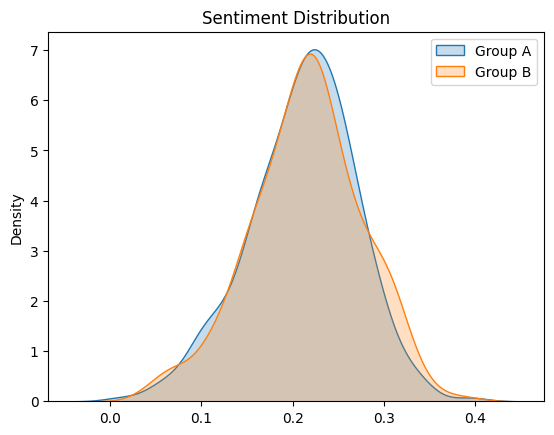

In [ ]:
# 视觉比较 sentiment
sns.kdeplot([TextBlob(t).sentiment.polarity for t in texts_a], label='Group A', fill=True)
sns.kdeplot([TextBlob(t).sentiment.polarity for t in texts_b], label='Group B', fill=True)
plt.title("Sentiment Distribution")
plt.legend()
plt.show()